In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%config InlineBackend.figure_format = "retina"
sns.set(style='white', rc={'figure.figsize':(12,3)})
plt.rc('font', family='Malgun Gothic') # 윈도우즈
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지

# 문제 1~5. 
- data.go.kr 공공데이터 포털에서 배포된 2013년~2015년까지의 와이드포멧 분양가격정보 csv파일과 2015년부터 2024년까지의 롱포멧 분양정보 csv 파일을 이용하여 다음의 데이터 정제 및 분석, 시각화한다.

# 문제 1.
- 2013년부터 2015년 8월까지 분양가 정보를 df_first 데이터 프레임 변수에 저장하고, df_first의 내용을 이용하여 heatmap을 그리시오.
(채점기준: 시각화 그래프 한글설정, csv load, 데이터프레임 결측치확인, set_index, heatmap 시각화 각 5점)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%config InlineBackend.figure_format = "retina"
sns.set(style='white', rc={'figure.figsize':(12,3)})
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

In [3]:
df_first = pd.read_csv('C:/ai_x/download/shareData/부동산_250213/전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv',
              encoding='cp949')
df_first.sample()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
10,충북,6589,6589,6611,6625,6678,6598,6587,6586,6586,...,6724,6743,6749,6747,6783,6790,6805,6682,6601,6603


In [4]:
df_first.isna().sum()

지역          0
2013년12월    0
2014년1월     0
2014년2월     0
2014년3월     0
2014년4월     0
2014년5월     0
2014년6월     0
2014년7월     0
2014년8월     0
2014년9월     0
2014년10월    0
2014년11월    0
2014년12월    0
2015년1월     0
2015년2월     0
2015년3월     0
2015년4월     0
2015년5월     0
2015년6월     0
2015년7월     0
2015년8월     0
dtype: int64

In [5]:
df_first.set_index('지역', inplace=True)

In [6]:
df_first.head(1)

,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
지역,,,,,,,,,,,,,,,,,,,,,
서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,19404,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443


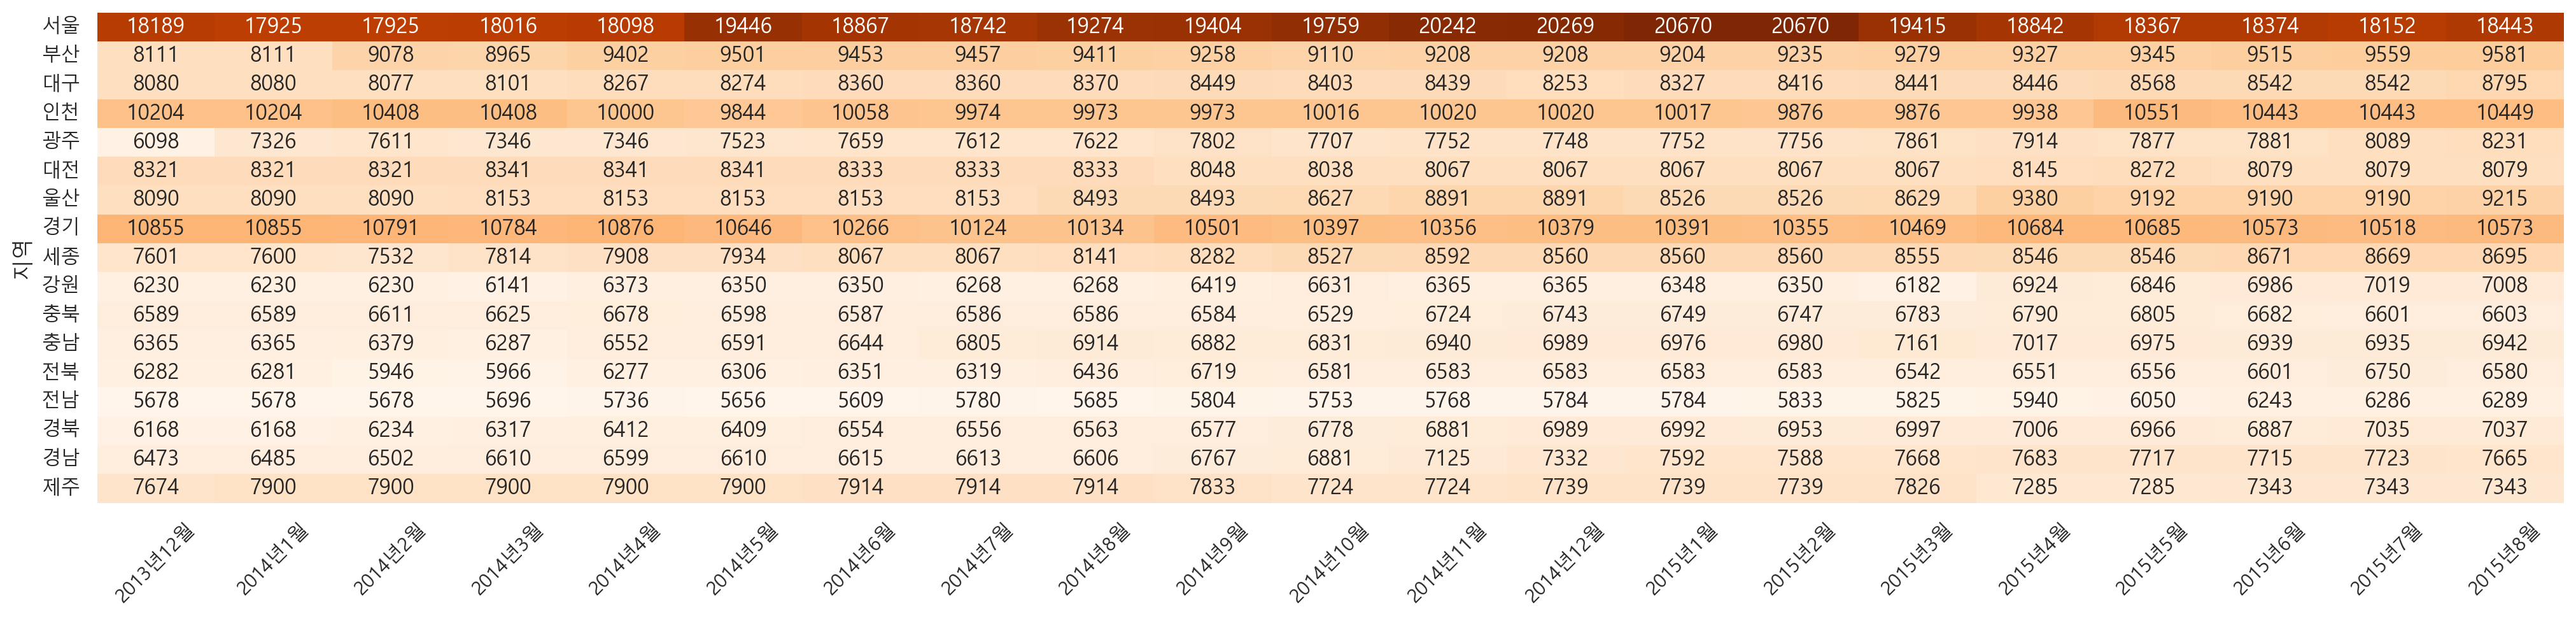

In [7]:
plt.figure(figsize=(25, 5))
sns.heatmap(df_first, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.xticks(rotation=45)
plt.show()

# 문제 2.
- 2015년 10월이후의 분양가 정보를 df_first 데이터 프레임 변수에 저장 후, 평당분양가격 컬럼을 추가하고 다음을 출력하시오.
- (채점기준 : csv load, 함수 정의, apply나 map적용, 평당분양가격 컬럼 추가 각 5점)

In [8]:
df_last = pd.read_csv('C:/ai_x/download/shareData/부동산_250213/주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20241231.csv',
              encoding='cp949')
df_last.sample(5)

,지역명,규모구분,연도,월,분양가격(제곱미터)
1763,전북,전용면적 85제곱미터초과 102제곱미터이하,2017,6,2321
6252,강원,전용면적 60제곱미터초과 85제곱미터이하,2021,11,2928
3524,울산,전용면적 102제곱미터초과,2019,3,NaN
1038,부산,전용면적 85제곱미터초과 102제곱미터이하,2016,10,3395
5576,충북,전용면적 60제곱미터이하,2021,3,2598


In [9]:
df_last.isna().sum()

지역명             0
규모구분            0
연도              0
월               0
분양가격(제곱미터)    614
dtype: int64

In [10]:
def df_last_int(price):
    if pd.isna(price):
        return np.nan
    elif price.strip() == '':
        return np.nan
    elif price.find(',') != -1:
        return int(price.replace(',',''))
    else:
        return int(price)
    
print(df_last_int(df_last.loc[0, '분양가격(제곱미터)'])) # 콤마제외한 문자를 숫자로 
print(df_last_int(df_last.loc[1, '분양가격(제곱미터)'])) # 콤마없는 문자를 숫자로 
print(df_last_int(df_last.loc[28, '분양가격(제곱미터)'])) # 공백문자를 nan
print(df_last_int(df_last.loc[368, '분양가격(제곱미터)'])) # nan을 nan

5841
5652
nan
nan


In [11]:
df_last['분양가격(제곱미터)'].apply(df_last_int)

0       5841.0
1       5652.0
2       5882.0
3       5721.0
4       5879.0
         ...  
9090    7703.0
9091       NaN
9092    7515.0
9093       NaN
9094    7950.0
Name: 분양가격(제곱미터), Length: 9095, dtype: float64

In [13]:
df_last['제곱미터당분양가격'] = df_last['분양가격(제곱미터)'].map(df_last_int)
df_last.tail()

,지역명,규모구분,연도,월,분양가격(제곱미터),제곱미터당분양가격
9090,제주,모든면적,2024,8,7703,7703.0
9091,제주,전용면적 60제곱미터이하,2024,8,NaN,NaN
9092,제주,전용면적 60제곱미터초과 85제곱미터이하,2024,8,7515,7515.0
9093,제주,전용면적 85제곱미터초과 102제곱미터이하,2024,8,NaN,NaN
9094,제주,전용면적 102제곱미터초과,2024,8,7950,7950.0


In [14]:
df_last['평당분양가격'] = df_last['제곱미터당분양가격']*3.3
df_last.head()

,지역명,규모구분,연도,월,분양가격(제곱미터),제곱미터당분양가격,평당분양가격
0,서울,모든면적,2015,10,5841,5841.0,19275.3
1,서울,전용면적 60제곱미터이하,2015,10,5652,5652.0,18651.6
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882,5882.0,19410.6
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721,5721.0,18879.3
4,서울,전용면적 102제곱미터초과,2015,10,5879,5879.0,19400.7


# 문제 3.
- df_last 데이터프레임의 연도별, 지역명별 평당 분양가격을 다음과 같이 집계하시오.
- (채점기준 : groupby나 pivot_table사용, 2차원 인덱스를 변경 등 각 5점)

In [15]:
loc_mean_df = df_last.groupby(['연도','지역명'])['평당분양가격'].mean()
loc_mean_df

연도    지역명
2015  강원      7188.060000
      경기     11060.940000
      경남      8459.220000
      경북      7464.160000
      광주      7916.700000
                 ...     
2024  전남     13540.415625
      전북     12400.941667
      제주     25096.087500
      충남     12739.650000
      충북     12851.767500
Name: 평당분양가격, Length: 170, dtype: float64

In [16]:
loc_mean_pivot_df = df_last.pivot_table(index='연도', columns='지역명', values='평당분양가격', aggfunc='mean')
loc_mean_pivot_df

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2015,7188.060000,11060.940,8459.220000,7464.160000,7916.700000,9018.900000,8190.600000,10377.400000,20315.680000,8765.020000,9367.600000,10976.020000,6798.880000,7110.400000,7951.075000,7689.880000,6828.800000
2016,7162.903846,11684.970,8496.730000,7753.405000,9190.683333,10282.030000,8910.733333,10743.535000,21753.435000,8857.805000,9582.574138,11099.055000,6936.600000,6906.625000,9567.480000,7958.225000,7133.335000
2017,7318.850000,12296.185,8806.600000,8288.063793,9599.700000,12191.972222,9912.910526,11637.615000,21864.095000,9132.945763,10630.160870,11672.430000,7413.230000,7406.126316,12628.539623,8157.315517,7462.565000
2018,8219.255000,14258.420,9327.670000,8680.776923,9526.953333,12139.252632,10234.106667,12889.965000,23202.245000,10340.463158,10241.400000,11881.532143,7929.845000,8174.595000,11935.968000,8201.820000,8149.295000
2019,8934.475000,15665.540,10697.615789,9050.250000,12111.675000,14081.650000,12619.200000,13537.865000,28286.830000,11299.394118,10216.250000,13249.775000,8219.275862,8532.260000,11828.469231,8748.840000,7970.875000
2020,10302.423214,15106.080,10919.272222,9997.693750,13406.485714,15314.200000,11238.844737,13353.010000,29781.015000,11628.100000,12837.600000,14982.990000,9562.398214,8559.430000,14192.876923,9139.380000,8358.956897
2021,10291.325000,14567.080,11302.335000,11227.150000,13709.850000,15586.285000,11994.216667,14317.655000,29380.450000,12578.060000,14191.953061,15774.330000,9980.760000,9047.928814,22302.342857,9860.741379,8822.385000
2022,11644.215000,16621.550,12455.685000,12018.050000,15095.885106,16821.915000,14113.880000,18166.835593,29128.531034,11309.971698,17903.751724,17341.830000,10635.508475,10003.070000,18953.825000,11730.345000,10033.540000
2023,13409.385000,20175.210,13283.182759,13025.320000,17957.852830,17656.747059,17917.288889,20470.850847,33230.560000,12278.200000,18832.093220,16150.695000,11846.682692,10966.024528,24095.901923,12580.590000,11103.950000


# 문제 4.
- 연도별 평당 분양가격의 boxplot에 분포를 추정할 수 있는 그래프를 그리시오.
- (채점기준 : 한글설정의 시각화, sns나 matplotlib 함수 사용 등 각 5점)

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%config InlineBackend.figure_format = "retina"
sns.set(style='white', rc={'figure.figsize':(12,3)})
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

In [18]:
year_mean_df = df_last.groupby(['연도'])['평당분양가격'].mean().sort_values(ascending=False).apply(lambda x : round(x))
year_mean_df

연도
2024    18963
2023    16891
2022    14943
2021    13636
2020    13039
2019    12188
2018    10979
2017    10373
2016     9683
2015     9203
Name: 평당분양가격, dtype: int64

In [19]:
import warnings
warnings.filterwarnings(action='ignore')

<Axes: xlabel='연도', ylabel='평당분양가격'>

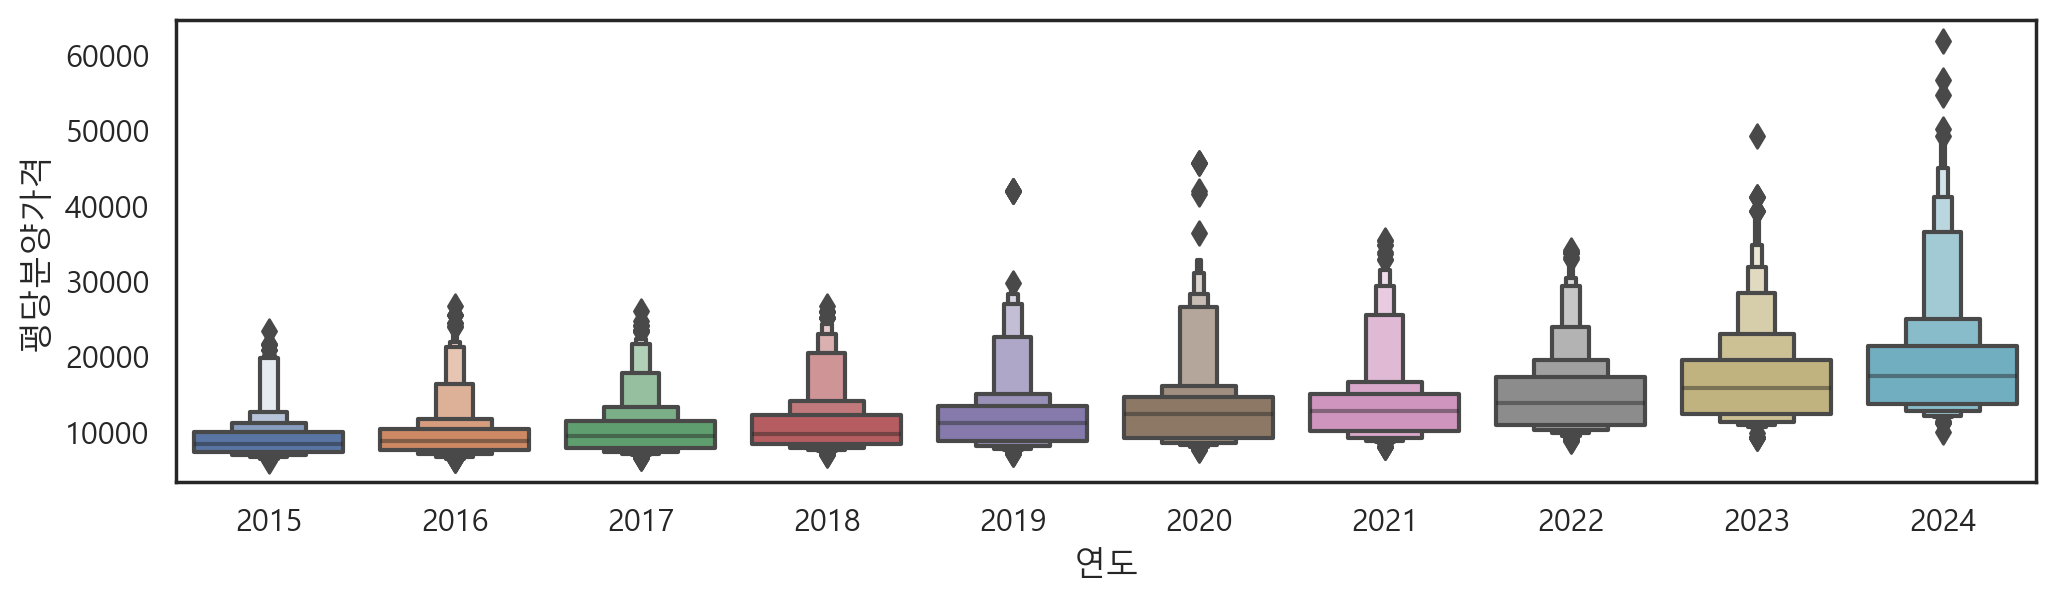

In [20]:
sns.boxenplot(data=df_last, x='연도', y='평당분양가격')

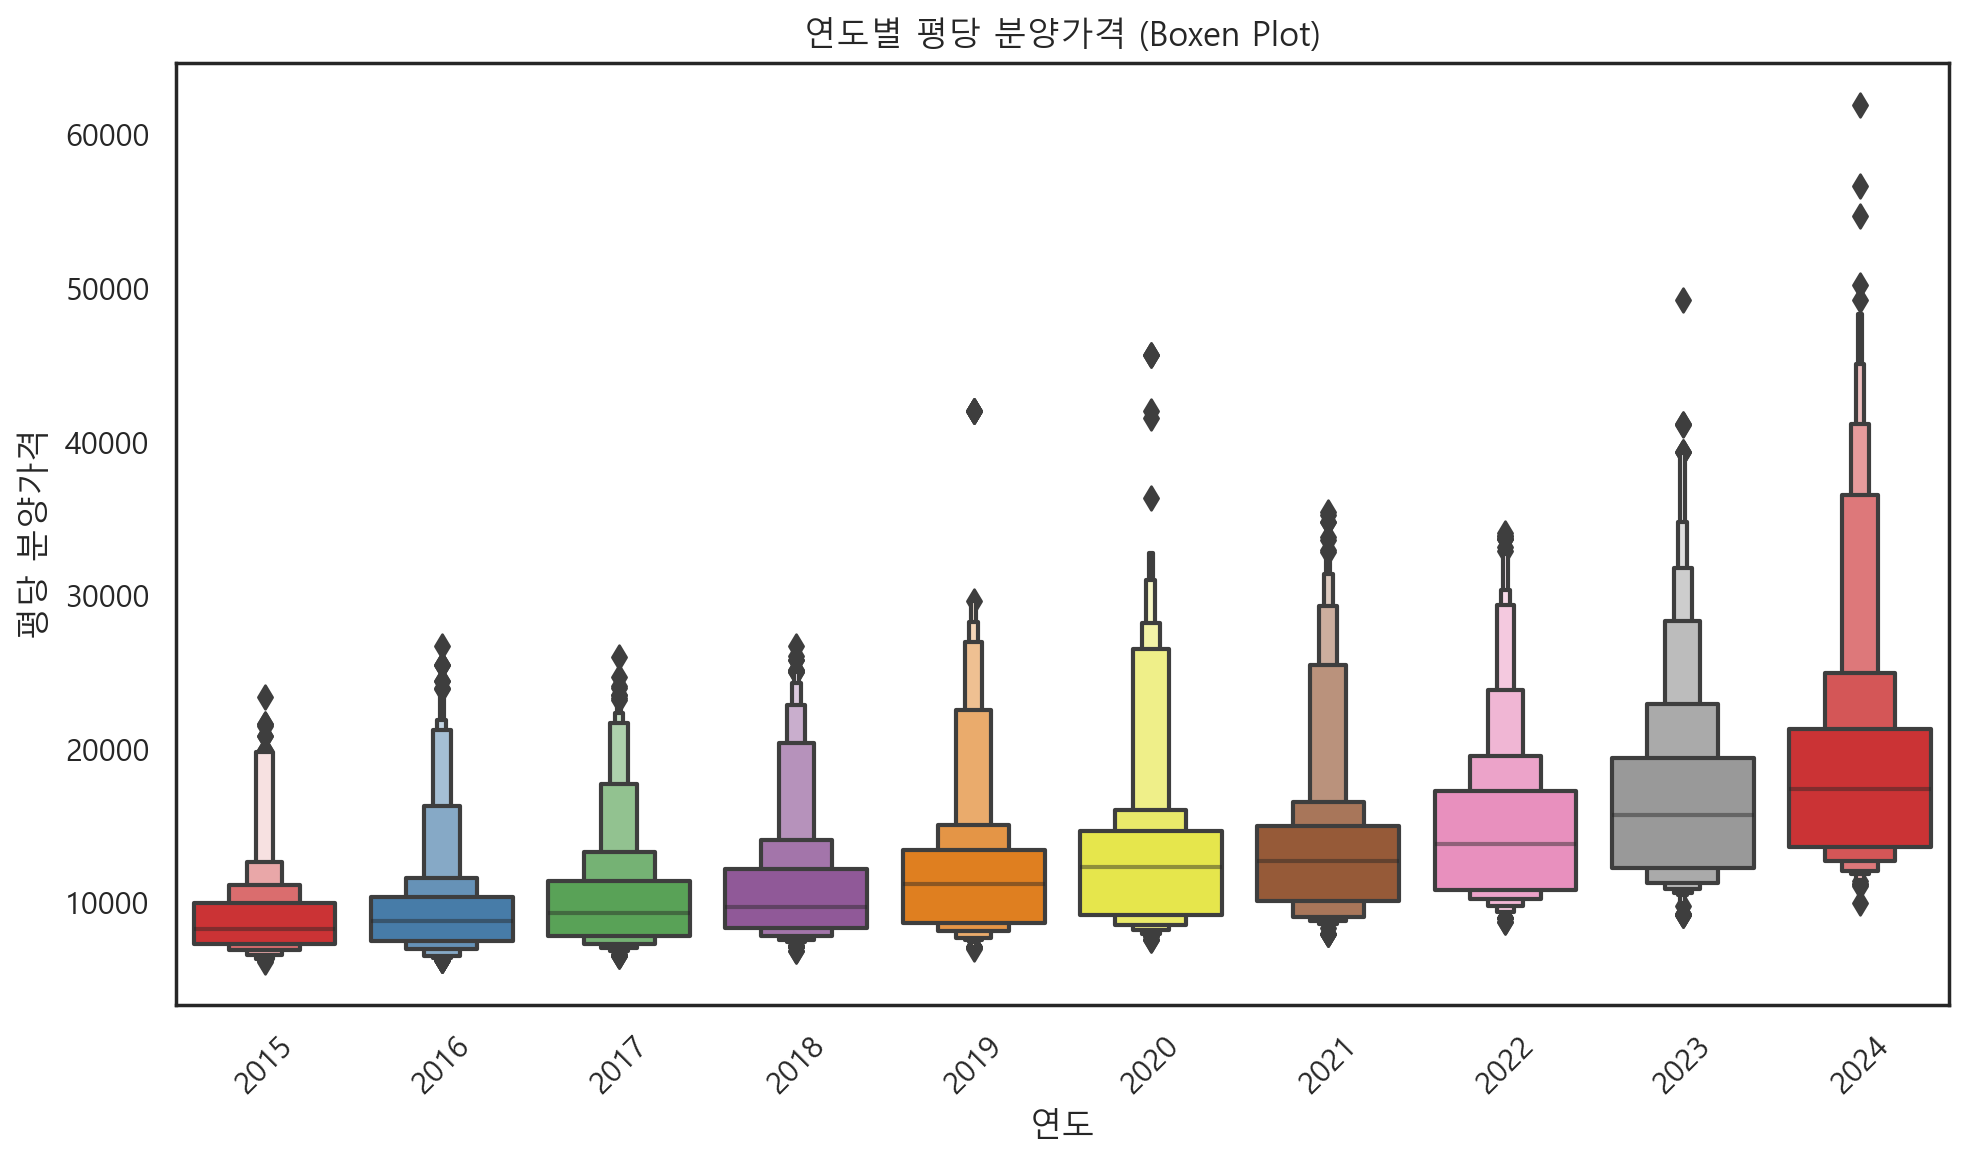

In [21]:
plt.figure(figsize=(10, 6))
ax = sns.boxenplot(data=df_last, x='연도', y='평당분양가격', palette='Set1')
ax.set_title("연도별 평당 분양가격 (Boxen Plot)")
ax.set_xlabel("연도")
ax.set_ylabel("평당 분양가격")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 문제 5.
- 구조가 다른 와이드 포멧 데이터 df_first와 롱포멧 데이터 df_last를 melt와 pivot_table함수를 이용하여, 아래와 같은 하나의 데이터셋으로 합쳐 df변수에 할당하고 df를 출력하시오.
- (채점기준 : 구조 변경을 위한 tidy 데이터 조작, apply 등을 이용한 데이터 분할, concat 사용, 필요없는 컬럼 drop, reset_index 방법 강구 등 각 5점)

In [22]:
display(df_first.head(1), df_last.head(1))

,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
지역,,,,,,,,,,,,,,,,,,,,,
서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,19404,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443


,지역명,규모구분,연도,월,분양가격(제곱미터),제곱미터당분양가격,평당분양가격
0,서울,모든면적,2015,10,5841,5841.0,19275.3


In [23]:
df_first.reset_index(inplace=True)
df_first.head(1)

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443


In [24]:
melted_first = df_first.melt(id_vars='지역', var_name='연도월', value_name='평당분양가격')
melted_first.head()

,지역,연도월,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098


In [25]:
melted_first['연도'] = melted_first['연도월'].map(lambda data : int(data.split('년')[0]))
melted_first.head(1)

,지역,연도월,평당분양가격,연도
0,서울,2013년12월,18189,2013


In [26]:
melted_first['월'] = melted_first['연도월'].apply(lambda data : int(data.split('년')[1][:-1]))
melted_first.head(1)

,지역,연도월,평당분양가격,연도,월
0,서울,2013년12월,18189,2013,12


In [27]:
melted_first.drop(['연도월'], axis=1, inplace=True)
melted_first.head(1)

,지역,평당분양가격,연도,월
0,서울,18189,2013,12


In [28]:
melted_first.columns = ['지역명','평당분양가격','연도','월']
melted_first.tail(1)

,지역명,평당분양가격,연도,월
356,제주,7343,2015,8


In [29]:
df_last.head(1)

,지역명,규모구분,연도,월,분양가격(제곱미터),제곱미터당분양가격,평당분양가격
0,서울,모든면적,2015,10,5841,5841.0,19275.3


In [30]:
drop_last = df_last.drop(['규모구분','분양가격(제곱미터)','제곱미터당분양가격'], axis=1)
drop_last

,지역명,연도,월,평당분양가격
0,서울,2015,10,19275.3
1,서울,2015,10,18651.6
2,서울,2015,10,19410.6
3,서울,2015,10,18879.3
4,서울,2015,10,19400.7
...,...,...,...,...
9090,제주,2024,8,25419.9
9091,제주,2024,8,NaN
9092,제주,2024,8,24799.5
9093,제주,2024,8,NaN


In [31]:
df = pd.concat([melted_first, drop_last])
df.index

Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       9085, 9086, 9087, 9088, 9089, 9090, 9091, 9092, 9093, 9094],
      dtype='int64', length=9452)

In [32]:
df.reset_index(drop=True, inplace=True)
df.head()

,지역명,평당분양가격,연도,월
0,서울,18189.0,2013,12
1,부산,8111.0,2013,12
2,대구,8080.0,2013,12
3,인천,10204.0,2013,12
4,광주,6098.0,2013,12


In [33]:
df = df[['지역명','연도','월','평당분양가격']]
df.head()

,지역명,연도,월,평당분양가격
0,서울,2013,12,18189.0
1,부산,2013,12,8111.0
2,대구,2013,12,8080.0
3,인천,2013,12,10204.0
4,광주,2013,12,6098.0


In [34]:
df.index

RangeIndex(start=0, stop=9452, step=1)

In [35]:
df.isna().sum()

지역명         0
연도          0
월           0
평당분양가격    740
dtype: int64

In [36]:
pivot_df = df.pivot_table(index='지역명', values='평당분양가격', aggfunc='median').sort_values(by='평당분양가격')
pivot_df.head(1)

,평당분양가격
지역명,
전남,8551.95


In [37]:
nan_pivot = pd.to_numeric(pivot_df['평당분양가격'], errors='coerce')
nan_pivot.isna().sum()

0

In [38]:
df = nan_pivot
df

지역명
전남     8551.95
충북     8563.50
전북     8622.90
충남     9051.90
강원     9296.10
경북     9538.65
경남    10114.50
세종    10436.25
대전    11662.20
광주    12375.00
제주    13074.60
부산    13325.40
울산    13622.40
인천    14477.10
경기    14491.95
대구    14571.15
서울    26670.60
Name: 평당분양가격, dtype: float64